<!-- TOC -->

- [10.Unsupervised Learning](#10unsupervised-learning)
    - [10.2 Principal Components Analysis](#102-principal-components-analysis)
        - [10.2.1 What Are Principal Components?](#1021-what-are-principal-components)
        - [10.2.2 Another Interpretation of Principal Components](#1022-another-interpretation-of-principal-components)
        - [10.2.3 More on PCA](#1023-more-on-pca)
    - [10.3 Clustering Methods](#103-clustering-methods)
        - [10.3.1 K-Means Clustering](#1031-k-means-clustering)
        - [10.3.2 Hierarchical Clustering](#1032-hierarchical-clustering)
    - [10.4 Lab 1: Principal Components Analysis](#104-lab-1-principal-components-analysis)
    - [10.5 Lab 2: Clustering](#105-lab-2-clustering)
        - [10.5.1 K-Means Clustering](#1051-k-means-clustering)
        - [10.5.2 Hierarchical Clustering](#1052-hierarchical-clustering)
    - [10.6 Lab 3: NCI60 Data Example](#106-lab-3-nci60-data-example)
        - [10.6.1 PCA on the NCI60 Data](#1061-pca-on-the-nci60-data)
        - [10.6.2 Clustering the Observations of the NCI60 Data](#1062-clustering-the-observations-of-the-nci60-data)

<!-- /TOC -->

# 10.Unsupervised Learning
## 10.2 Principal Components Analysis
### 10.2.1 What Are Principal Components?
The **first principal component** of a set of features $X_1, X_2, \cdots , X_p$ is the normalized linear combination of the features

$Z_1=\phi_{11}X_1+\phi_{21}X_2+\cdots+\phi_{p1}X_p\ (10.1)$

that has the largest variance. By **normalized**, we mean that $\sum_{j=1}^p\phi_{j1}^2=1.$

We then look for the linear combination of the sample feature values of the form

$z_{i1}=\phi_{11}x_{i1}+\phi_{21}x_{i2}+\cdots+\phi_{p1}x_{ip}\ (10.2)$

that has largest sample variance, subject to the constraint that $\sum_{j=1}^p\phi_{j1}^2=1.$ In other words, the first principal component loading vector solves the optimization problem

$maximize_{\phi_{11},\cdots,\phi_{p1}}\{\frac{1}{n}\sum_{i=1}^n(\sum_{j=1}^p\phi_{j1}x_{ij})^2\}\ subject\ to\ \sum_{j=1}^p\phi_{j1}^2=1.\ (10.3)$

The second principal component is the linear combination of $X_1, \cdots , X_p$ that has maximal variance out of all linear combinations that are uncorrelated with $Z_1$. The second principal component scores $z_{12},z_{22},\cdots,z_{n2}$ take the form

$z_{i2}=\phi_{12}x_{i1}+\phi_{22}x_{i2}+\cdots+\phi_{p2}x_{ip},\ (10.4)$

![](http://ou8qjsj0m.bkt.clouddn.com//17-12-28/81425632.jpg)

### 10.2.2 Another Interpretation of Principal Components
The first principal component loading vector has a very special property: it is the line in p-dimensional space that is closest to the n observations (using average squared Euclidean distance as a measure of closeness). 

The first two principal components of a data set span the plane that is closest to the n observations, in terms of average squared Euclidean distance.

### 10.2.3 More on PCA


## 10.3 Clustering Methods
### 10.3.1 K-Means Clustering
The within-cluster variation for cluster $C_k$ is a measure $W (C_k)$ of the amount by which the observations within a cluster differ from each other. Hence we want to solve the problem

$minimize_{C_1,\cdots,C_K}\{\sum_{k=1}^K W(C_k)\}.\ (10.9)$

Algorithm 10.1 K-Means Clustering
1. Randomly assign a number, from 1 to K, to each of the observations. These serve as initial cluster assignments for the observations. 
2. Iterate until the cluster assignments stop changing:
    1. For each of the K clusters, compute the cluster **centroid**. The kth cluster centroid is the vector of the p feature means for the observations in the kth cluster.
    1. Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).

### 10.3.2 Hierarchical Clustering
In this section, we describe **bottom-up** or **agglomerative** clustering.

Algorithm 10.2 Hierarchical Clustering
1. Begin with n observations and a measure (such as Euclidean distance) of all the $\binom{n}{2}$ pairwise dissimilarities. Treat each observation as its own cluster.
1. For i=n,n−1,...,2:
    1. Examine all pairwise inter-cluster dissimilarities among the i clusters and identify the pair of clusters that are least dissimilar (that is, most similar). Fuse these two clusters. The dissimilarity between these two clusters indicates the height in the dendro- gram at which the fusion should be placed.
    1. Compute the new pairwise inter-cluster dissimilarities among the i − 1 remaining clusters.

Linkage | Description
--- | ---
Complete | Maximal intercluster dissimilarity. Compute all pairwise dis- similarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities.
Single | Minimal intercluster dissimilarity. Compute all pairwise dis- similarities between the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time.
Average | Mean intercluster dissimilarity. Compute all pairwise dis- similarities between the observations in cluster A and the observations in cluster B, and record the average of these dissimilarities.
Centroid | Dissimilarity between the centroid for cluster A (a mean vector of length p) and the centroid for cluster B. Centroid linkage can result in undesirable inversions.

TABLE 10.2. A summary of the four most commonly-used types of linkage in hierarchical clustering.

## 10.4 Lab 1: Principal Components Analysis

In [2]:
states=row.names(USArrests)
states

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

In [3]:
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [4]:
apply(USArrests, 2, var)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

We now perform principal components analysis using the **prcomp()** function, which is one of several functions in R that perform PCA.

In [5]:
pr.out=prcomp(USArrests, scale=TRUE)
names(pr.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

The center and scale components correspond to the means and standard deviations of the variables that were used for scaling prior to implementing PCA.

In [6]:
pr.out$center

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [7]:
pr.out$scale

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

Each column of pr.out$rotation contains the corresponding principal component loading vector.

In [8]:
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


In [10]:
dim(pr.out$x)

[1] 50  4

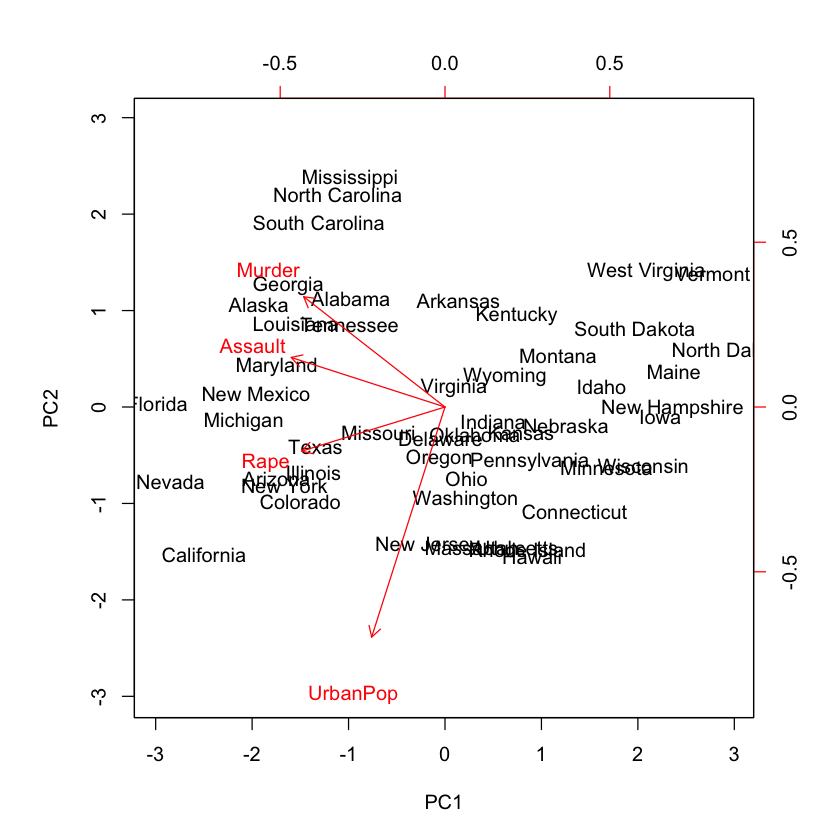

In [11]:
biplot(pr.out, scale=0)

In [12]:
pr.out$sdev

[1] 1.5748783 0.9948694 0.5971291 0.4164494

In [13]:
pr.var=pr.out$sdev^2
pr.var

[1] 2.4802416 0.9897652 0.3565632 0.1734301

In [14]:
pve=pr.var/sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

We see that the first principal component explains 62.0 % of the variance in the data, the next principal component explains 24.7 % of the variance, and so forth. We can plot the PVE explained by each component, as well as the cumulative PVE, as follows:

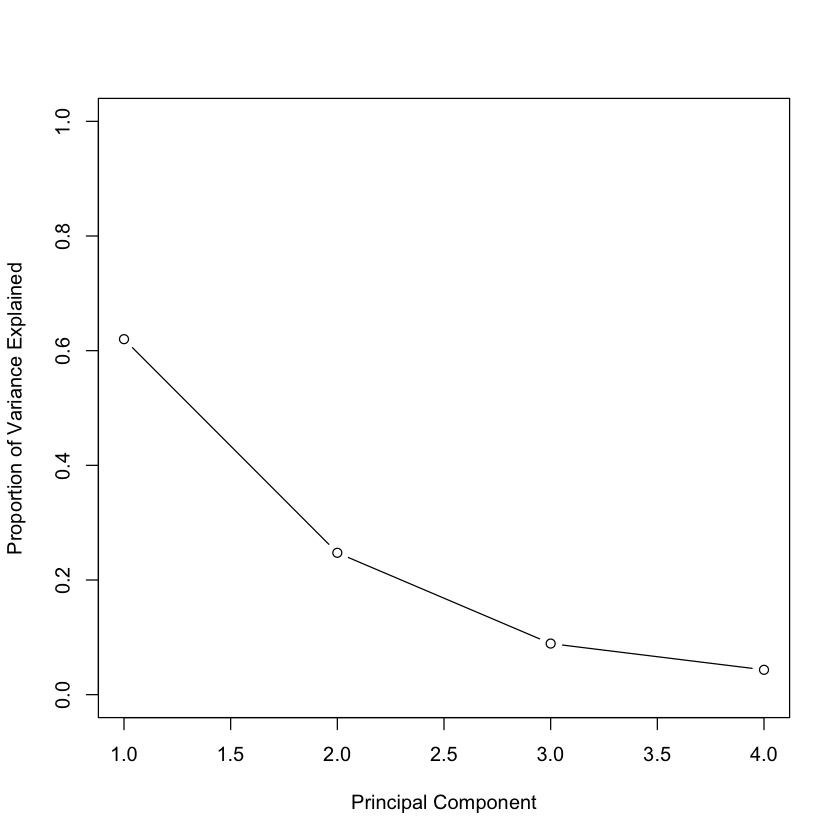

In [15]:
plot(pve, xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1),type='b')

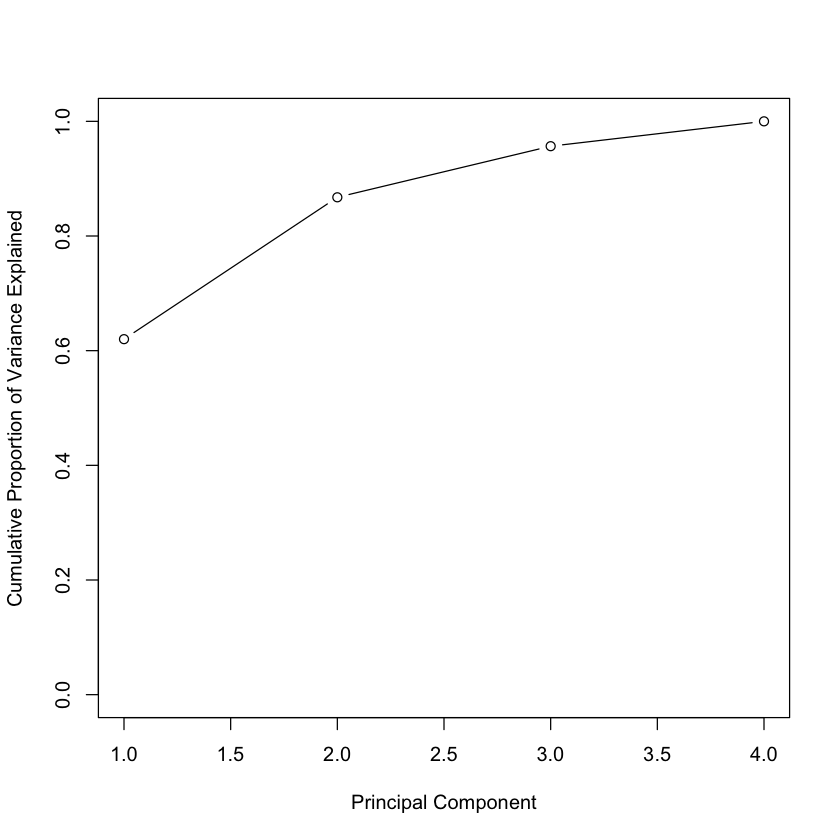

In [16]:
plot(cumsum(pve), xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", ylim=c(0,1), type='b')

## 10.5 Lab 2: Clustering
### 10.5.1 K-Means Clustering

In [17]:
set.seed(2)
x=matrix(rnorm(50*2), ncol=2)
x[1:25,1]=x[1:25,1]+3
x[1:25,2]=x[1:25,2]-4

In [18]:
km.out=kmeans(x,2,nstart=20)
km.out$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

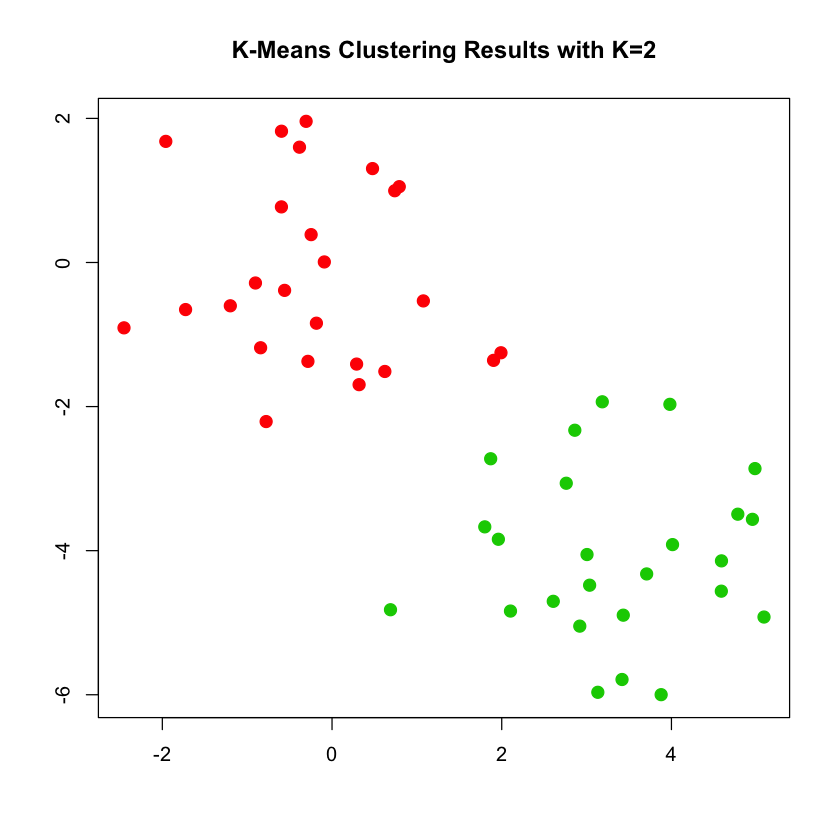

In [19]:
plot(x, col=(km.out$cluster +1), main="K-Means Clustering Results with K=2", xlab="", ylab="", pch=20, cex=2)

In [20]:
set.seed(4)
km.out=kmeans(x,3,nstart=20)
km.out

K-means clustering with 3 clusters of sizes 10, 23, 17

Cluster means:
        [,1]        [,2]
1  2.3001545 -2.69622023
2 -0.3820397 -0.08740753
3  3.7789567 -4.56200798

Clustering vector:
 [1] 3 1 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3 3 3 3 3 1 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

Within cluster sum of squares by cluster:
[1] 19.56137 52.67700 25.74089
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Here we compare using nstart=1 to nstart=20.

In [21]:
set.seed(3)
km.out=kmeans(x,3,nstart=1)
km.out$tot.withinss

[1] 104.3319

In [22]:
km.out=kmeans(x,3,nstart=20)
km.out$tot.withinss

[1] 97.97927

Note that km.out\$tot.withinss is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering (Equation 10.11). The individual within-cluster sum-of-squares are contained in the vector km.out\$withinss.

We strongly recommend always running K-means clustering with a large value of nstart, such as 20 or 50, since otherwise an undesirable local optimum may be obtained.

### 10.5.2 Hierarchical Clustering

In [23]:
hc.complete=hclust(dist(x), method="complete")
hc.average=hclust(dist(x), method="average")
hc.single=hclust(dist(x), method="single")

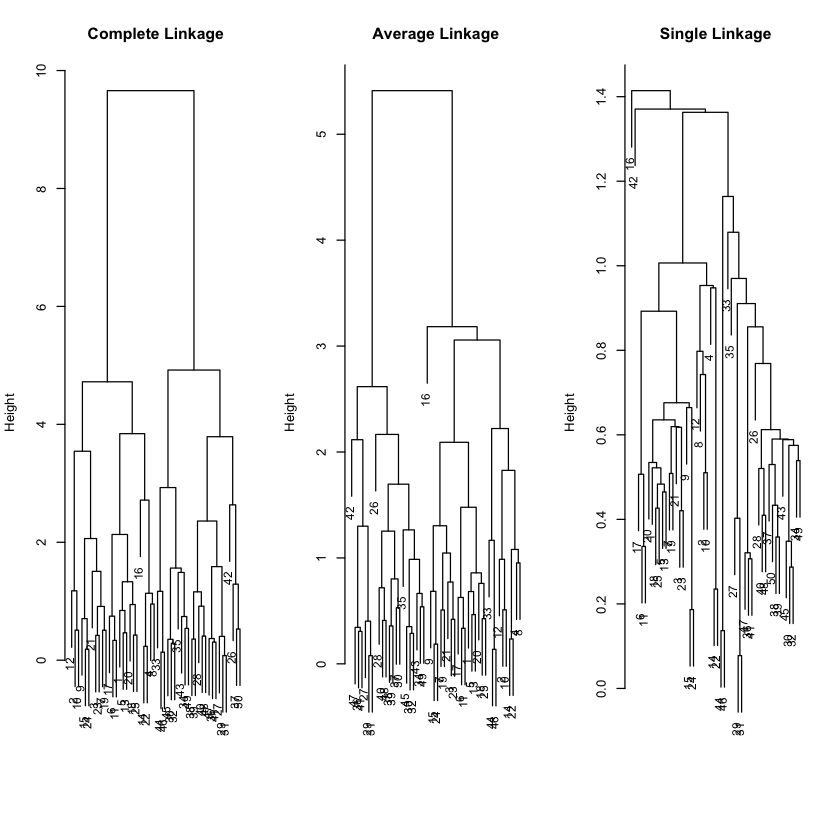

In [24]:
par(mfrow=c(1,3))
plot(hc.complete,main="Complete Linkage", xlab="", sub="", cex =.9)
plot(hc.average , main="Average Linkage", xlab="", sub="", cex =.9)
plot(hc.single , main="Single Linkage", xlab="", sub="", cex =.9)

To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the **cutree()** function:

In [25]:
cutree(hc.complete, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [26]:
cutree(hc.average, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

In [27]:
cutree(hc.single, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

In [28]:
cutree(hc.single , 4)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

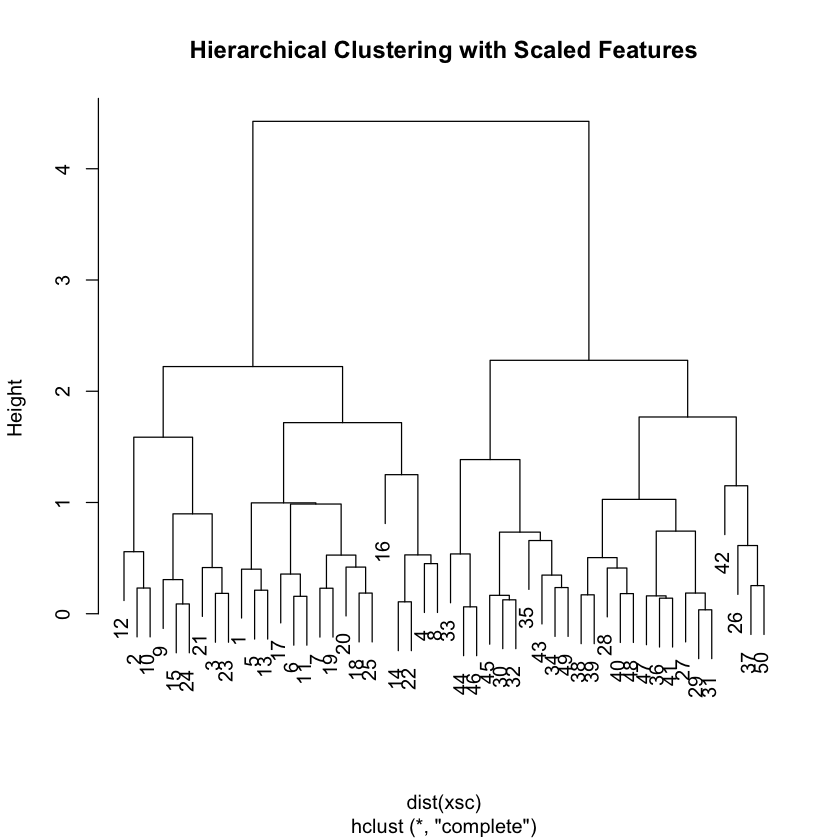

In [29]:
xsc=scale(x)
plot(hclust(dist(xsc), method="complete"), main="Hierarchical Clustering with Scaled Features")

We will cluster a three-dimensional data set:

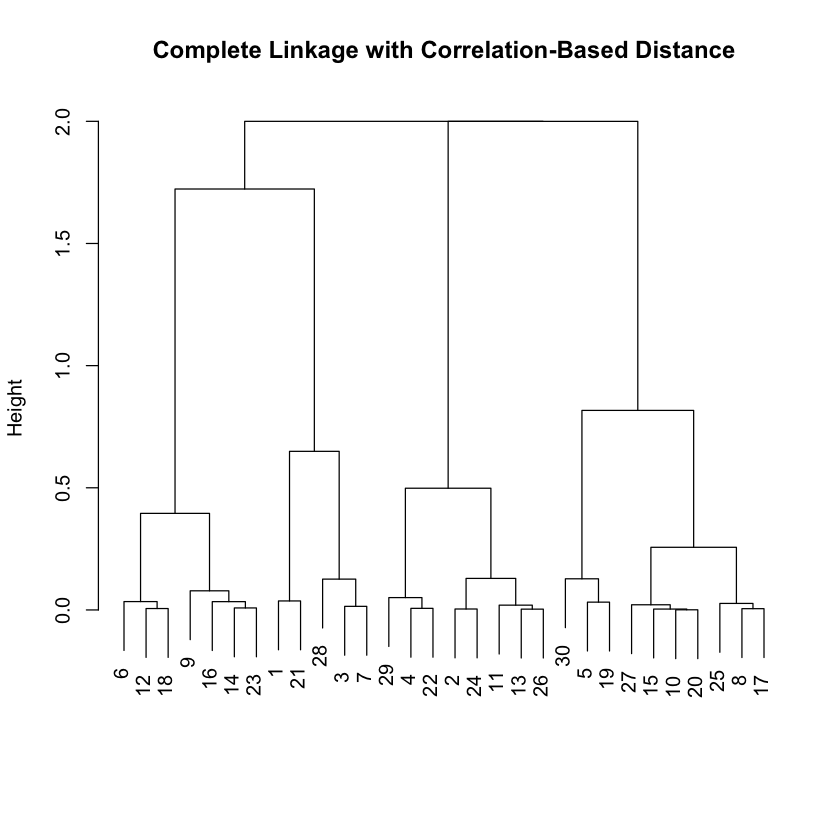

In [30]:
x=matrix(rnorm(30*3), ncol=3)
dd=as.dist(1-cor(t(x)))
plot(hclust(dd, method="complete"), main="Complete Linkage with Correlation-Based Distance", xlab="", sub="")

## 10.6 Lab 3: NCI60 Data Example

In [31]:
library(ISLR)
nci.labs=NCI60$labs
nci.data=NCI60$data
dim(nci.data)

[1]   64 6830

In [32]:
nci.labs[1:4]

[1] "CNS"   "CNS"   "CNS"   "RENAL"

In [33]:
table(nci.labs)

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

### 10.6.1 PCA on the NCI60 Data

In [34]:
pr.out=prcomp(nci.data, scale=TRUE)

The function will be used to assign a color to each of the 64 cell lines, based on the cancer type to which it corresponds.

In [35]:
Cols=function(vec) {
    cols=rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
}

Note that the **rainbow()** function takes as its argument a positive integer, and returns a vector containing that number of distinct colors. We now can plot the principal component score vectors.

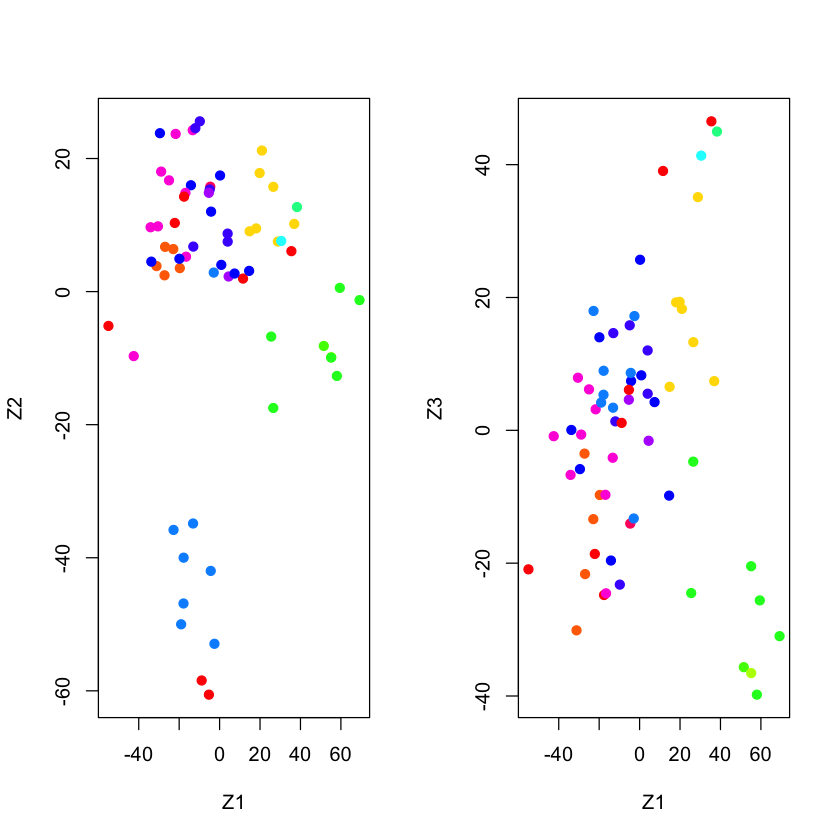

In [36]:
par(mfrow=c(1,2))
plot(pr.out$x[,1:2], col=Cols(nci.labs), pch=19, xlab="Z1",ylab="Z2")
plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch=19, xlab="Z1",ylab="Z3")

In [37]:
summary(pr.out)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

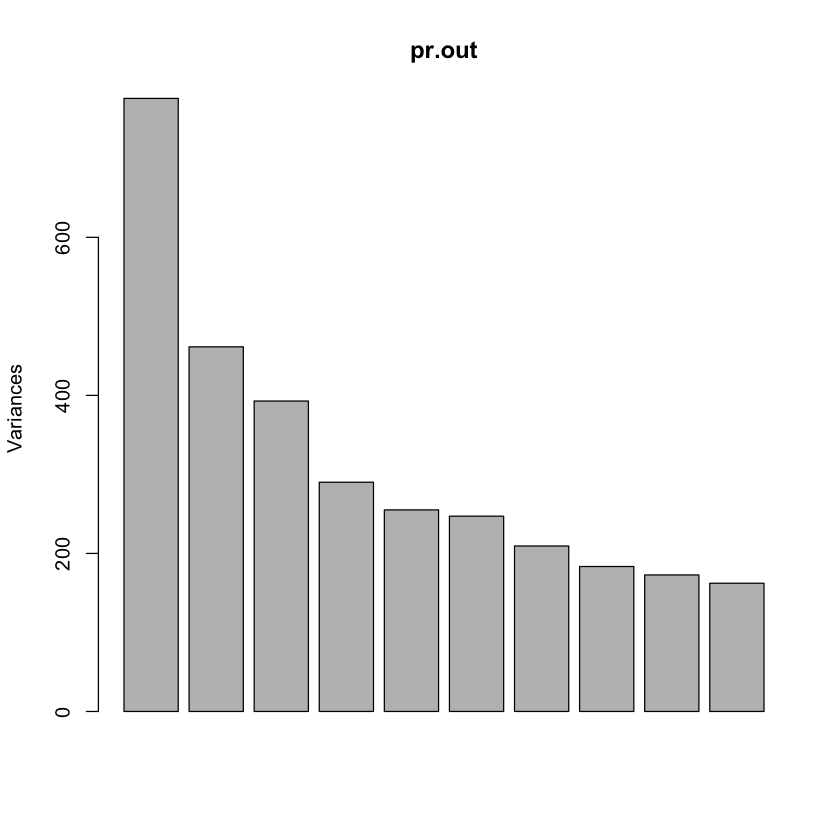

In [38]:
plot(pr.out)

It is more informative to plot the PVE of each principal component (i.e. a scree plot) and the cu- mulative PVE of each principal component.

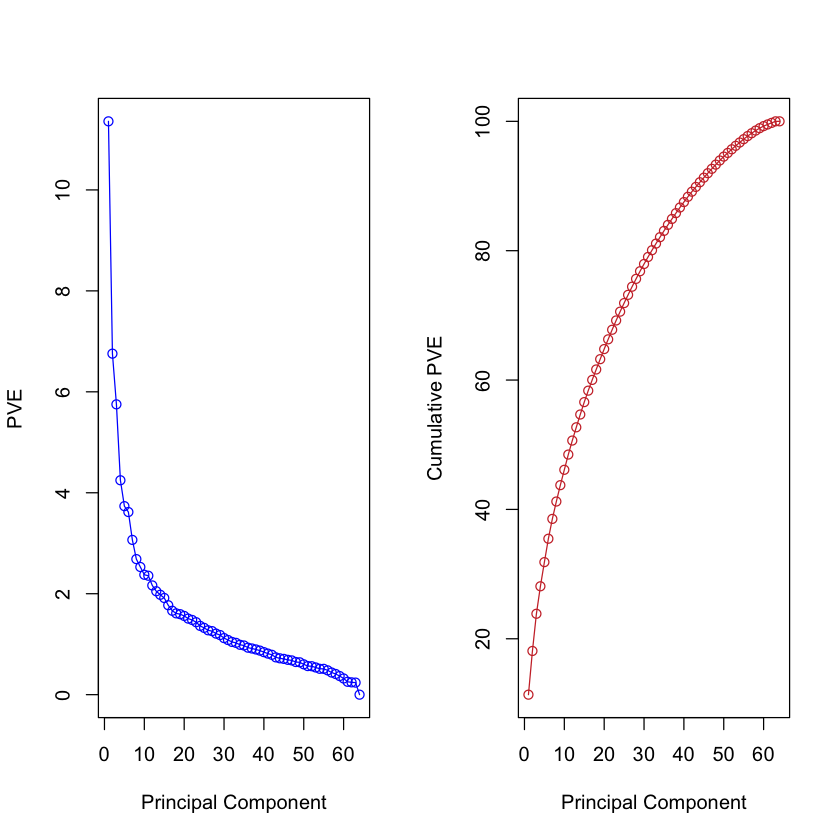

In [39]:
pve=100*pr.out$sdev^2/sum(pr.out$sdev^2)
par(mfrow=c(1,2))
plot(pve, type="o", ylab="PVE", xlab="Principal Component", col ="blue")
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="Principal Component", col ="brown3")

### 10.6.2 Clustering the Observations of the NCI60 Data

In [40]:
sd.data=scale(nci.data)

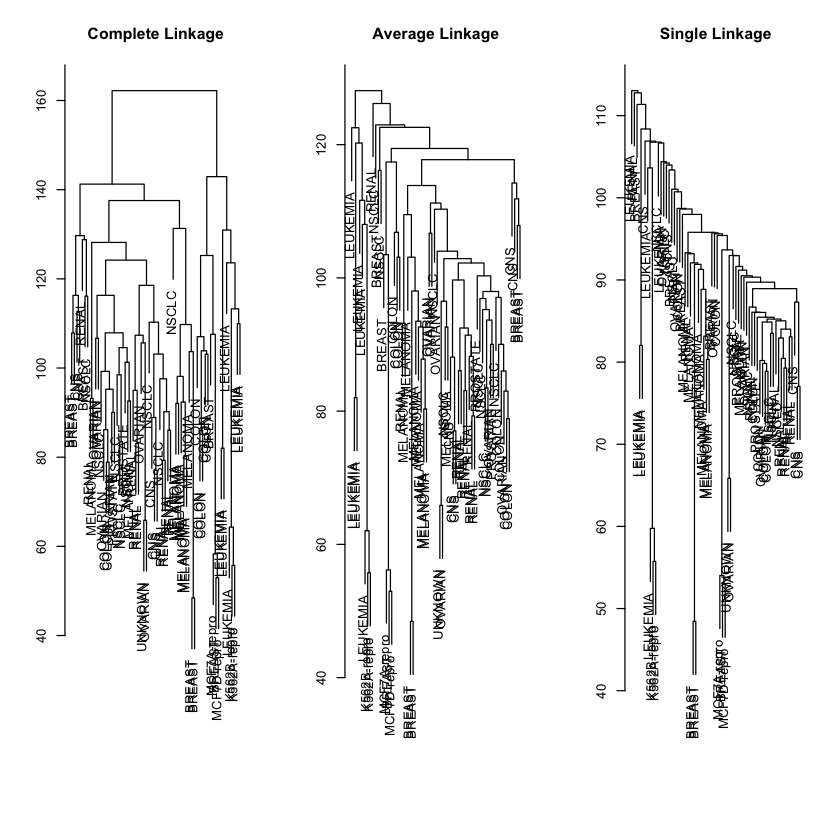

In [41]:
par(mfrow=c(1,3))
data.dist=dist(sd.data)
plot(hclust(data.dist), labels=nci.labs, main="Complete Linkage", xlab="", sub="",ylab="")
plot(hclust(data.dist, method="average"), labels=nci.labs, main="Average Linkage", xlab="", sub="",ylab="")
plot(hclust(data.dist, method="single"), labels=nci.labs, main="Single Linkage", xlab="", sub="",ylab="")

We can cut the dendrogram at the height that will yield a particular number of clusters, say four:

In [42]:
hc.out=hclust(dist(sd.data))
hc.clusters=cutree(hc.out,4)
table(hc.clusters,nci.labs)

           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

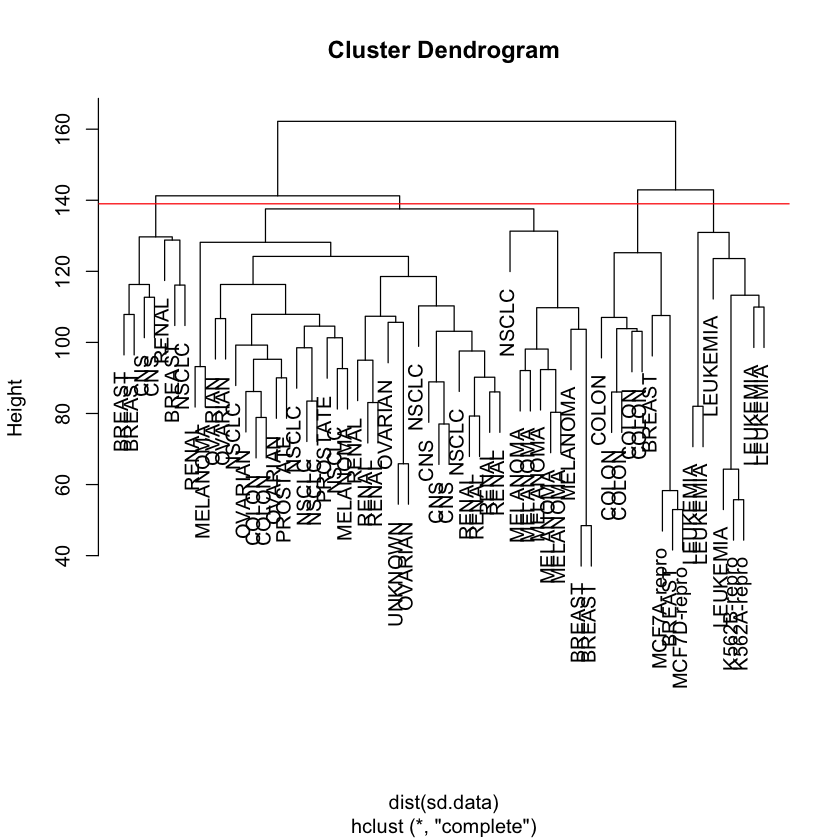

In [43]:
par(mfrow=c(1,1))
plot(hc.out, labels=nci.labs)
abline(h=139, col="red")

In [44]:
hc.out


Call:
hclust(d = dist(sd.data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


How do these NCI60 hierarchical clustering results compare to what we get if we perform K-means clustering with K = 4?

In [45]:
set.seed (2)
km.out=kmeans(sd.data, 4, nstart=20)
km.clusters=km.out$cluster
table(km.clusters, hc.clusters)

           hc.clusters
km.clusters  1  2  3  4
          1 11  0  0  9
          2  0  0  8  0
          3  9  0  0  0
          4 20  7  0  0

Rather than performing hierarchical clustering on the entire data matrix, we can simply perform hierarchical clustering on the first few principal component score vectors, as follows:

   nci.labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci.labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0

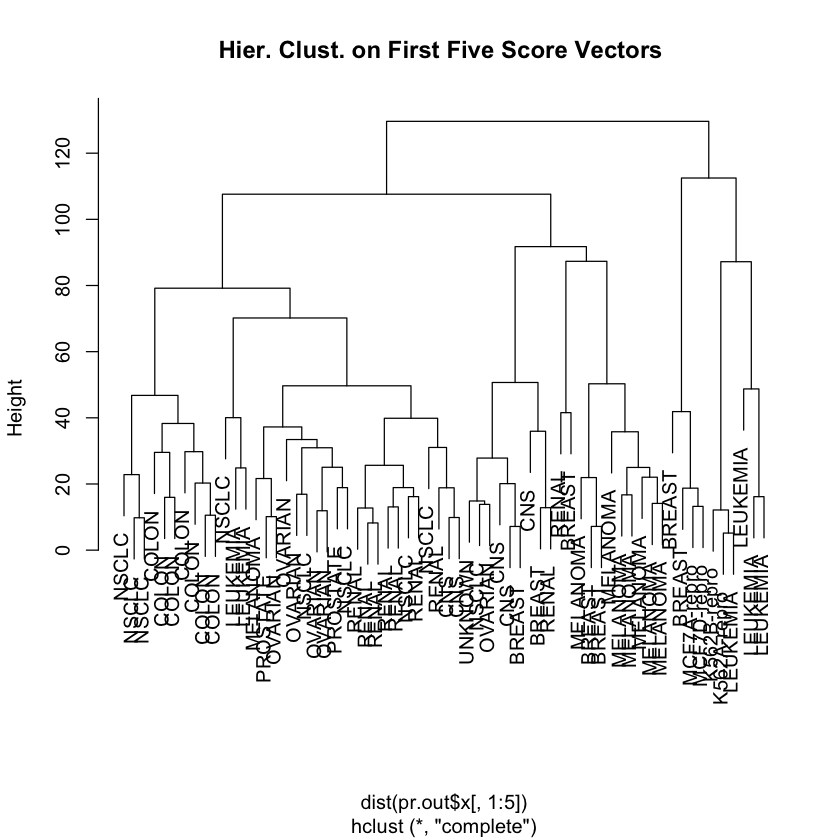

In [46]:
hc.out=hclust(dist(pr.out$x[,1:5]))
plot(hc.out, labels=nci.labs, main="Hier. Clust. on First Five Score Vectors ")
table(cutree(hc.out,4), nci.labs)